<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du Lagrangien Augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problémes sans
contraintes (fichier `Lagrangien_Augmente.jl`). La spécification de l'algorithme du Lagrangien augmenté est donnée ci-dessous.
 

In [190]:
using LinearAlgebra
using Documenter
using Markdown  
include("Lagrangien_Augmente.jl")
@doc Lagrangien_Augmente

#### Objet

Résolution des problèmes de minimisation avec une contrainte d'égalité scalaire par l'algorithme du lagrangien augmenté.

#### Syntaxe

```julia
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Entrées

  * algo : (String) l'algorithme sans contraintes à utiliser:

      * "newton"  : pour l'algorithme de Newton
      * "cauchy"  : pour le pas de Cauchy
      * "gct"     : pour le gradient conjugué tronqué
  * f : (Function) la fonction à minimiser
  * gradf       : (Function) le gradient de la fonction
  * hessf       : (Function) la hessienne de la fonction
  * c     : (Function) la contrainte [x est dans le domaine des contraintes ssi $c(x)=0$]
  * gradc : (Function) le gradient de la contrainte
  * hessc : (Function) la hessienne de la contrainte
  * x0 : (Array{Float,1}) la première composante du point de départ du Lagrangien
  * options : (Array{Float,1})

    1. epsilon     : utilisé dans les critères d'arrêt
    2. tol         : la tolérance utilisée dans les critères d'arrêt
    3. itermax     : nombre maximal d'itération dans la boucle principale
    4. lambda0     : la deuxième composante du point de départ du Lagrangien
    5. mu0, tho    : valeurs initiales des variables de l'algorithme

#### Sorties

  * xmin : (Array{Float,1}) une approximation de la solution du problème avec contraintes
  * fxmin : (Float) $f(x_{min})$
  * flag : (Integer) indicateur du déroulement de l'algorithme

      * 0    : convergence
      * 1    : nombre maximal d'itération atteint
      * (-1) : une erreur s'est produite
  * niters : (Integer) nombre d'itérations réalisées
  * muks : (Array{Float64,1}) tableau des valeurs prises par mu_k au cours de l'exécution
  * lambdaks : (Array{Float64,1}) tableau des valeurs prises par lambda_k au cours de l'exécution

#### Exemple d'appel

```julia
using LinearAlgebra
algo = "gct" # ou newton|gct
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
c(x) =  (x[1]^2) + (x[2]^2) -1.5
gradc(x) = [2*x[1] ;2*x[2]]
hessc(x) = [2 0;0 2]
x0 = [1; 0]
options = []
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Tolérances des algorithmes appelés

Pour les tolérances définies dans les algorithmes appelés (Newton et régions de confiance), prendre les tolérances par défaut définies dans ces algorithmes.


3. Vérifier que les tests ci-dessous passent.

In [191]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

affiche = true

@testset "Test lagrangien augmente" begin
	tester_lagrangien_augmente(affiche, Lagrangien_Augmente)
end;

-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 1 au point initial x01 :
  * xsol = [0.5000000120317563, 1.2499999939841218, 0.5000000120317561]
  * f(xsol) = 2.2499998917141957
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 1 au point initial x02 :
  * xsol = [0.5000000120317563, 1.2499999939841218, 0.5000000120317561]
  * f(xsol) = 2.2499998917141957
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 2 au point initial x03 :
  * xsol = [0.9072339581821048, 0.8227554520804995]
  * f(xsol) = 0.008615651092530208
  * nb_iters = 6
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.8227554

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.
 
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.
 
 3. **Supplémentaire** : 
      Que proposez-vous comme méthode pour la résolution des problèmes avec
      des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet)
      ce nouvel algorithme.

## Réponses

1. Nous allons étudier les paramètres $\lambda_k$ et $\mu_k$.

    #### Etude de $\lambda_k$ et de $\mu_k$ :

In [192]:
import Pkg
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `C:\Users\natha\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\natha\.julia\environments\v1.8\Manifest.toml`


Analyse des λₖ calculés par Newton :


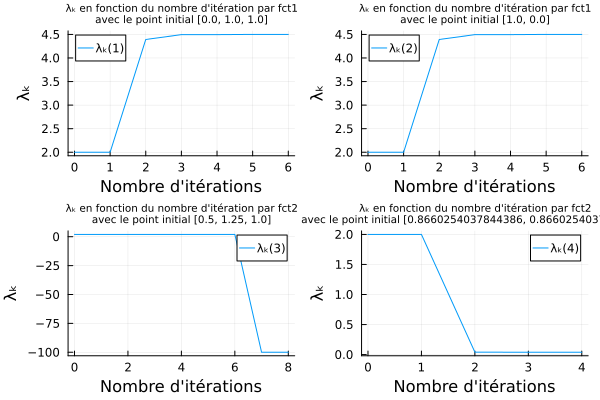

Analyse des μₖ calculés par Newton :


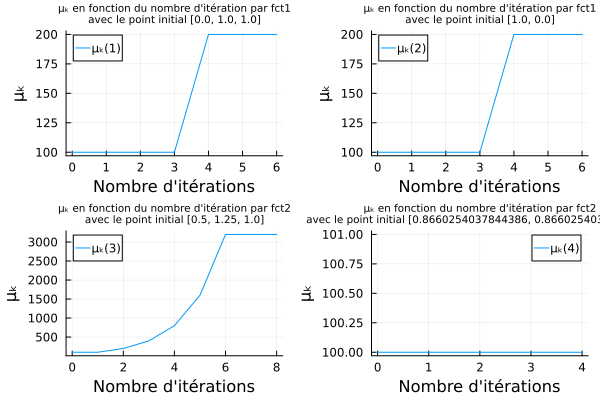

In [193]:
function calcul_res(algo,fct,contrainte,grad_fct,hess_fct,grad_contrainte,hess_contrainte,points,opt)
    listLambda = []
    listMu = []
    listIter = []
    m = length(listPoints)
    n = length(listPoints[1])
    for i in 1:m
        for j in 1:n
            p = points[i][j]
            _,_,_,nb_iter,muks,lambdaks = Lagrangien_Augmente(algo,fct[i],contrainte[i],grad_fct[i],hess_fct[i],
                                                               grad_contrainte[i],hess_contrainte[i],p,opt)
            push!(listIter,nb_iter)
            push!(listMu,muks)
            push!(listLambda,lambdaks)            
        end
    end
    return listIter, listMu, listLambda    
end

function affiche_res(nomParam,nomAlgo,listIter,listVal,fct,points)
    listCourbe = []
    printstyled("Analyse des ", nomParam, " calculés par ", nomAlgo," :\n",bold=true,color=:blue)
    m = length(listIter)
    for i in 1:m
        i_affiche = (i==1||i==2) ? 1 : 2
        j = (i==1||i==3) ? 1 : 2
        courbe = plot(0:listIter[i], listVal[i], label="$(nomParam)($(i))", xlabel="Nombre d'itérations", ylabel=nomParam, 
title="$(nomParam) en fonction du nombre d'itération par $(fct[i_affiche])\navec le point initial $(points[j][i_affiche])"
,titlefont=font(7))
        push!(listCourbe, courbe)
    end
    plot(listCourbe[1],listCourbe[2],listCourbe[3],listCourbe[4], layout=(2,2))
    display(Plots.plot!())
end

epsilon = 1e-2
tol = 1e-5
itermax = 1000
lambda0 = 2
mu0 = 100
tho = 2
options = [epsilon, tol, itermax, lambda0, mu0, tho]

fct = [fct1, fct2]
contrainte = [contrainte1, contrainte2]
grad_fct = [grad_fct1, grad_fct2]
hess_fct = [hess_fct1, hess_fct2]
grad_contrainte = [grad_contrainte1, grad_contrainte2]
hess_contrainte = [hess_contrainte1, hess_contrainte2]
listPoints = [[pts2.x01, pts2.x02],[pts2.x03, pts2.x04]]

#-------------------------------------------------------------------------------------------------------------------------------------#
listIter, listMu, listLambda = calcul_res("newton",fct,contrainte,grad_fct,hess_fct,grad_contrainte,hess_contrainte,listPoints,options)
affiche_res("λₖ","Newton",listIter,listLambda,fct,listPoints)
affiche_res("μₖ","Newton",listIter,listMu,fct,listPoints)

Analyse des λₖ calculés par RC-Pas de Cauchy :


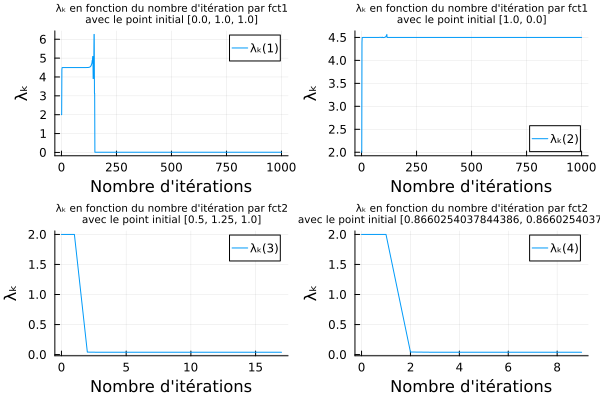

Analyse des μₖ calculés par RC-Pas de Cauchy :


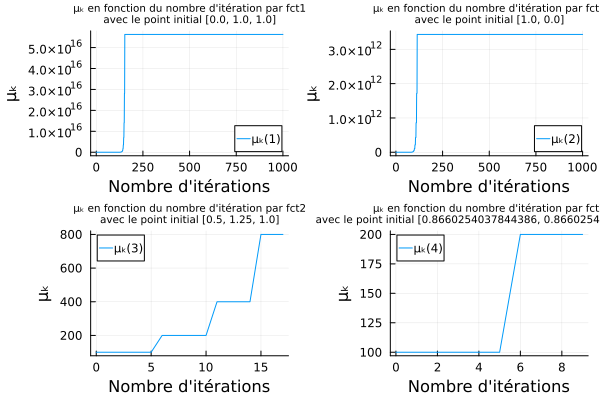

In [194]:
listIter, listMu, listLambda = calcul_res("cauchy",fct,contrainte,grad_fct,hess_fct,grad_contrainte,hess_contrainte,listPoints,options)
affiche_res("λₖ","RC-Pas de Cauchy",listIter,listLambda,fct,listPoints)
affiche_res("μₖ","RC-Pas de Cauchy",listIter,listMu,fct,listPoints)

Analyse des λₖ calculés par RC-Gradient Conjugué Tronqué :


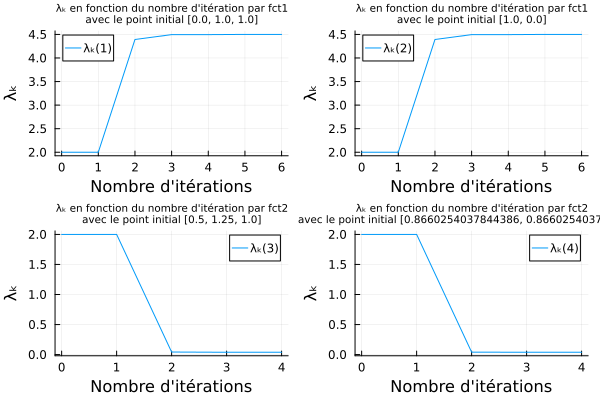

Analyse des μₖ calculés par RC-Gradient Conjugué Tronqué :


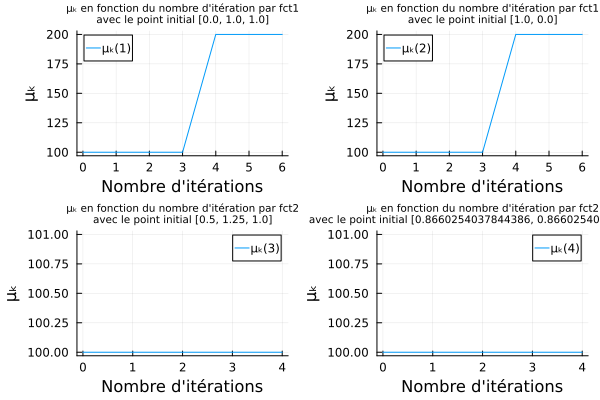

In [195]:
listIter, listMu, listLambda = calcul_res("gct",fct,contrainte,grad_fct,hess_fct,grad_contrainte,hess_contrainte,listPoints,options)
affiche_res("λₖ","RC-Gradient Conjugué Tronqué",listIter,listLambda,fct,listPoints)
affiche_res("μₖ","RC-Gradient Conjugué Tronqué",listIter,listMu,fct,listPoints)

   ###### Commentaires :

   * $\lambda_k$ : 
   * $\mu_k$ : 

2. Nous allons étudier le paramètre $\tau$.

    #### Etude de $\tau$ :

Analyse de la performance de Newton en fonction de τ :


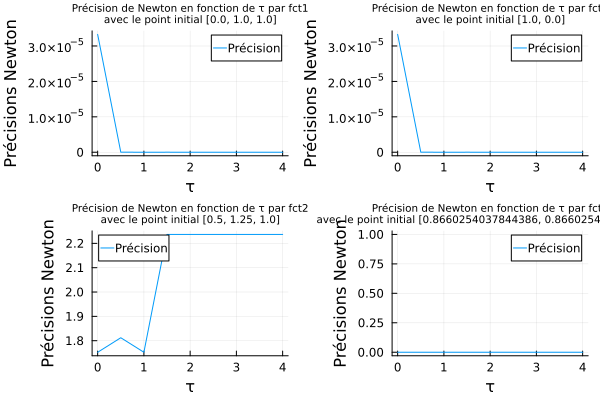

In [196]:
function calcul_resu(algo,fct,contrainte,grad_fct,hess_fct,grad_contrainte,hess_contrainte,points,opt,listTau,sol_exact)
    listCompare = [[],[],[],[]]
    m = length(listPoints)
    n = length(listPoints[1])
    i_store = 0
    for i in 1:m
        i_store += 1
        for j in 1:n
            i_store += (j==1) ? 0 : 1
            p = points[i][j]
            for to in listTau
                opt[6] = to
                xmin,_,_,_,_,_ = Lagrangien_Augmente(algo,fct[i],contrainte[i],grad_fct[i],hess_fct[i],grad_contrainte[i],
                                                     hess_contrainte[i],p,opt)
                push!(listCompare[i_store],norm(xmin-sol_exact[i]))
            end
        end
    end
    return listCompare    
end

function affiche_resu(nomAlgo,listComparaison,listValTau,fct,points)
    listCourbe = []
    printstyled("Analyse de la performance de ", nomAlgo," en fonction de τ :\n",bold=true,color=:blue)
    m = length(listPoints) # nombre de lignes
    n = length(listPoints[1]) # nombre de colonnes
    for i in 1:(m+n)
        i_affiche = (i==1||i==2) ? 1 : 2
        j = (i==1||i==3) ? 1 : 2
        courbe = plot(listValTau, listComparaison[i], label="Précision", xlabel="τ", ylabel="Précisions $(nomAlgo)", 
title="Précision de $(nomAlgo) en fonction de τ par $(fct[i_affiche])\navec le point initial $(points[j][i_affiche])"
,titlefont=font(7))
        push!(listCourbe, courbe)
    end
    plot(listCourbe[1],listCourbe[2],listCourbe[3],listCourbe[4], layout=(2,2))
    display(Plots.plot!())
end

sol_exact_augm  = [sol_fct1_augm,sol_fct2_augm]
tau = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

#-------------------------------------------------------------------------------------------------------------------------------------#
listCompareTau = calcul_resu("newton",fct,contrainte,grad_fct,hess_fct,grad_contrainte,hess_contrainte,listPoints,options,tau,sol_exact_augm)
affiche_resu("Newton",listCompareTau,tau,fct,listPoints)

Analyse de la performance de 
RC-Pas de Cauchy en fonction de τ :


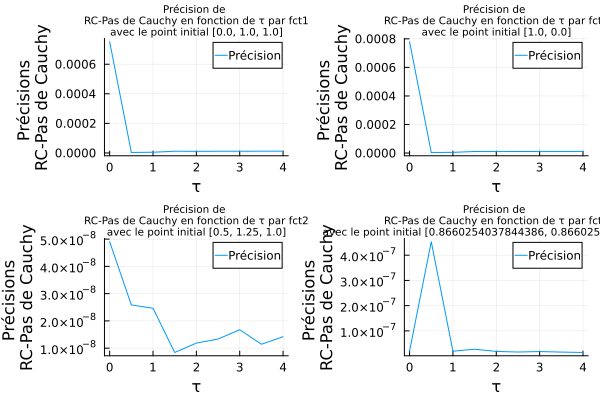

In [197]:
listCompareTau = calcul_resu("cauchy",fct,contrainte,grad_fct,hess_fct,grad_contrainte,hess_contrainte,listPoints,options,tau,sol_exact_augm)
affiche_resu("\nRC-Pas de Cauchy",listCompareTau,tau,fct,listPoints)

Analyse de la performance de RC-Gradient
Conjugué Tronqué en fonction de τ :


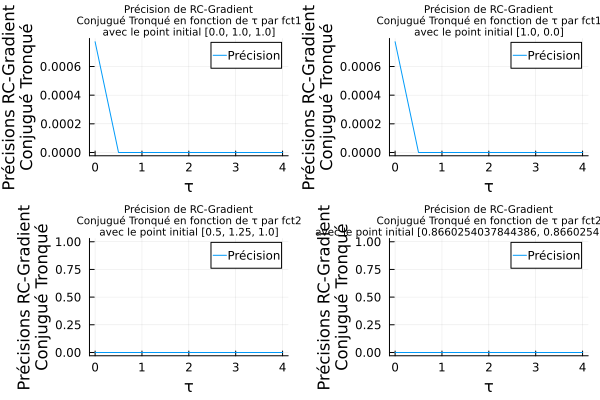

In [198]:
listCompareTau = calcul_resu("gct",fct,contrainte,grad_fct,hess_fct,grad_contrainte,hess_contrainte,listPoints,options,tau,sol_exact_augm)
affiche_resu("RC-Gradient\nConjugué Tronqué",listCompareTau,tau,fct,listPoints)

###### Commentaire :

De manière générale, on remarque que plus $\tau$ augmente, plus la précision est élevée.